# Lab 7

We will be using a subset of the Amazon reviews dataset. We'll be using the "Industrial and Scientific" subset, containing 77,071 reviews and 1,758,988 ratings.

https://nijianmo.github.io/amazon/index.html#subsets

In [1]:
import tensorflow as tf
import os

# For Apple Silicon (M1/M2) Macs, add:
if os.uname().machine == 'arm64':
    # Enable Metal backend
    tf.config.experimental.set_visible_devices([], 'GPU')

# Check GPU availability
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Configure GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)

# Set GPU as default device
if gpus:
    strategy = tf.distribute.MirroredStrategy()
    print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
else:
    print("No GPU found - using CPU")

# Verify GPU is being used
print("TensorFlow GPU device:", tf.test.gpu_device_name())

Num GPUs Available: 1
GPU memory growth enabled
Number of devices: 1
TensorFlow GPU device: /device:GPU:0


In [2]:
# code adapted from course github
import os
import json
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import pandas as pd

# We had to modify the original json file slightly to fix a few syntax errors.
# We added commas to separate each json object and encapsulated all of the objects
# in square brackets so that the file could be read correctly.
df = pd.read_json('Industrial_and_Scientific_5.json')

# Add column that identifies if the review was positive or negative.
# Positive reviews will be defined as reviews that have an 'overall' rating of 3 or higher (inclusive). Negative reviews will be anything below 3.
df.loc[df['overall'] >= 3.0, 'Pos_Neg'] = 'Pos'
df.loc[df['overall'] < 3, 'Pos_Neg'] = 'Neg'

# Drop all columns except for Pos_Neg, reviewText, and asin (item ID)
drop_columns = ['image', 'reviewerID', 'vote', 'reviewerName', 'style', 'summary', 'unixReviewTime', 'reviewTime']
df = df.drop(drop_columns, axis=1)

# Double check that the column was added correctly
df.tail(50)

,overall,verified,asin,reviewText,Pos_Neg
77021,5,True,B01GUEP5HC,Filament looks almost like bronze when printed...,Pos
77022,5,True,B01GUEP5HC,"easy smooth clean prints, a little dark but a ...",Pos
77023,5,True,B01GWD9VU8,"Quick shipping, product as described, good pro...",Pos
77024,4,True,B01GWD9VU8,Very good value. All units are complete and t...,Pos
77025,4,True,B01GXMLBD8,I use these jumpers on my breadboards and many...,Pos
77026,5,True,B01GXQMP66,GREAT PRODUCT!,Pos
77027,3,True,B01H1RDJOI,I was unable to change the display to Fahrenhe...,Pos
77028,4,True,B01H1RDJOI,Replaced the old thermometer in my YongHeng co...,Pos
77029,2,True,B01H35YR7Q,These aren't as good as there old ones. They w...,Neg
77030,2,True,B01H35YR7Q,A little too small for the flash forge build s...,Neg


We decided to use the Tokenizer class from tensorflow. The function "fit_on_texts" is usesful for tokenizing textual data, which serves our purposes well. To ensure that the function did what we wanted to, we printed out the first 10 words and their frequency in the dataset.

We decided to use the same number of words (1000) and padding length (500) as we did in class because the datasets are similar. In class, we worked with the IMDB dataset, which was a set of movie reviews. Our dataset is a collection of Amazon product reviews, so we deemed it appropriate to use the same parameters since both datasets are reviews.

We will use the F1-score to evaluate our algorithm's performance. With our model, there are no drastic consequences if the model is wrong. It isn't as if we're working with medical data and may incorrectly identify if someone has cancer or not. So, we will simply use the F1-score, which provides the "harmonic mean of the precision and recall" (https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html). We don't particularly need to take into account false negatives or false positives when evaluating our data, so the standard F1-score will be sufficient.

We decided to use a simple 80/20 split for our training and testing data. Our dataset has over 77,000 instances in it; this is an ample number of datapoints to have examples of a variety of different cases (in this case, positive or negative reviews). According to this website (https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/), the train_test_split method is commonly used for large datasets. If our model were to be implemented in the real world, we would want it to be efficient and be able to handle even larger datasets without having a large computation time. Thus, we determined an 80/20 split was the best course of action for our model.

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

reviews = df['reviewText'].astype(str)
labels = df['Pos_Neg'].values

# Tokenizing the reviews, but only keeping the top 1000 words as we did in class
top_words = 1000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(reviews)

# Check to make sure things have been tokenized correctly
print("Word index [first 10 words]")
print({word: tokenizer.word_index[word] for word in list(tokenizer.word_index.keys())[:10]})

print("\nWord Counts (first 10 words):")
print({word: tokenizer.word_counts[word] for word in list(tokenizer.word_counts)[:10]})


# Encoding the tokenized words into sequences of integers
X = tokenizer.texts_to_sequences(reviews)

# Padding/Truncating the sequences to be the same length
max_review_length = 500
X = sequence.pad_sequences(X, maxlen=max_review_length)

X = np.array(X)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

# Print example to make sure the tokenization and padding has occured correctly
print(f'X example: {X_train[0]} y example: {y_train[0]}')

Word index [first 10 words]
{'the': 1, 'to': 2, 'and': 3, 'a': 4, 'i': 5, 'it': 6, 'is': 7, 'of': 8, 'for': 9, 'this': 10}

Word Counts (first 10 words):
{'this': 46158, 'worked': 3696, 'really': 6012, 'well': 14547, 'for': 49332, 'what': 8551, 'i': 90449, 'used': 9861, 'it': 72930, 'so': 17029}
X_train shape: (61656, 500), y_train shape: (61656,)
X_test shape: (15415, 500), y_test shape: (15415,)
X example: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Modeling

X_train shape: (61656, 500) dtype: float32
y_train shape: (61656,) dtype: float32
Sample y values: [1. 1. 1. 1. 1.]

Training CNN_dropout_0.3
Epoch 1/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9407 - loss: 0.1932 - val_accuracy: 0.9538 - val_loss: 0.1269
Epoch 2/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9600 - loss: 0.1056 - val_accuracy: 0.9518 - val_loss: 0.1412
Epoch 3/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9711 - loss: 0.0794 - val_accuracy: 0.9560 - val_loss: 0.1325
Epoch 4/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9826 - loss: 0.0502 - val_accuracy: 0.9552 - val_loss: 0.1472
Epoch 5/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9526 - val_loss: 0.1791

Training CNN_dropout_0.5
Epoch 1/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9414 - loss: 0.1968 - val_accuracy: 0.9512 - val_loss: 0.1302
Epoch 2/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step 

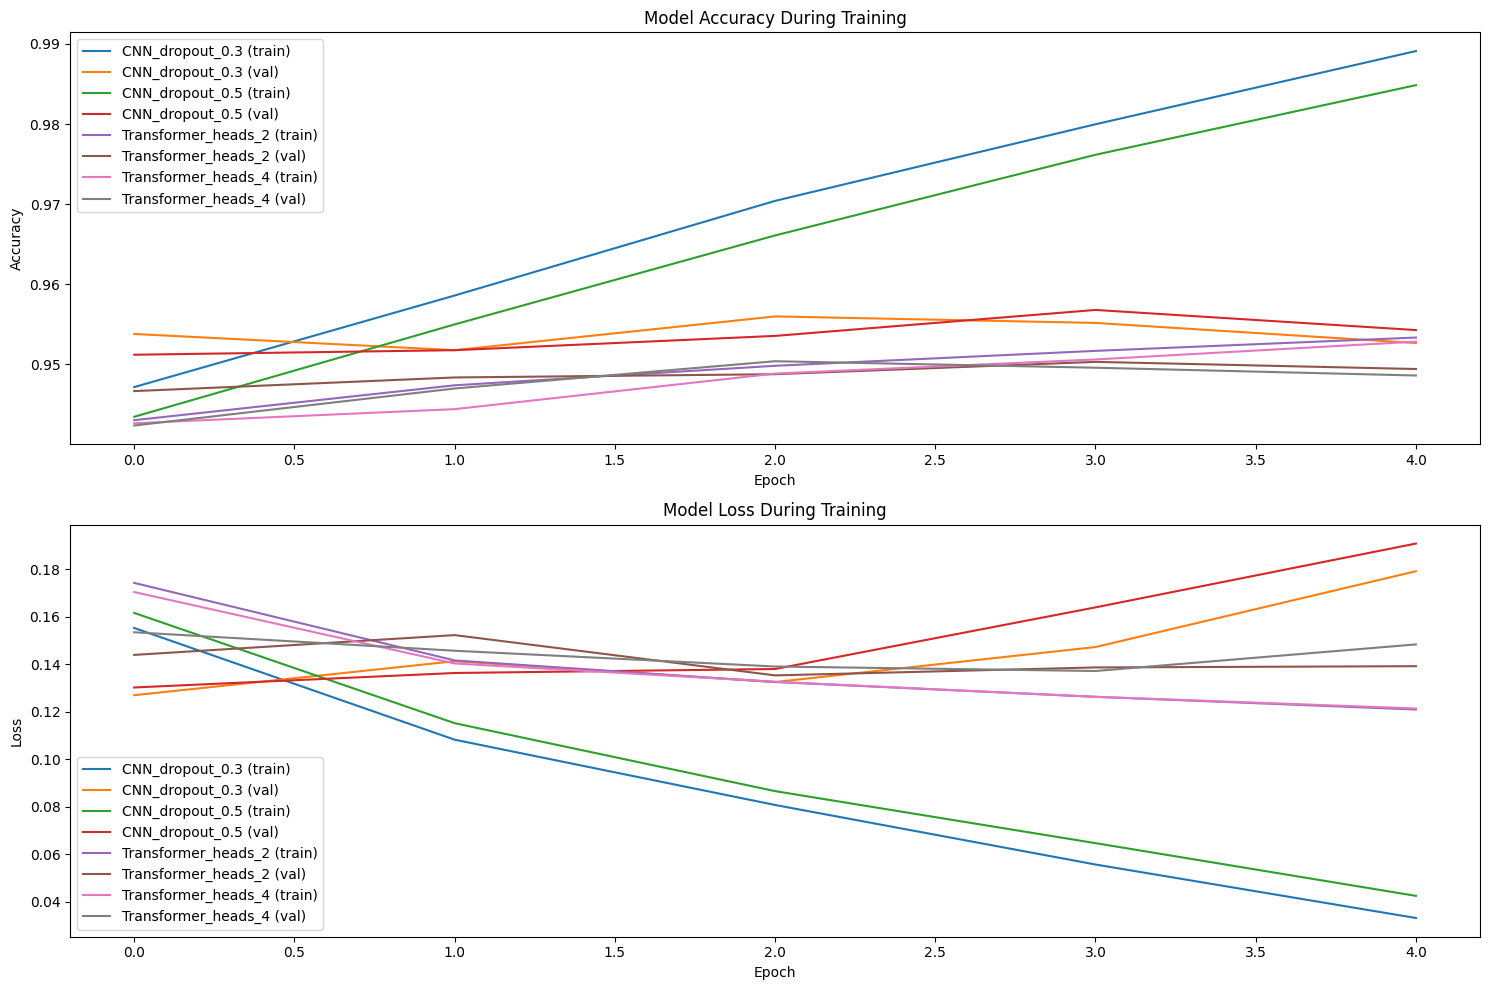


Test Accuracies:
CNN_dropout_0.3: 0.9506
CNN_dropout_0.5: 0.9565
Transformer_heads_2: 0.9503
Transformer_heads_4: 0.9500


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Input
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

# Map string labels to numbers
label_map = {'Pos': 1, 'Neg': 0}  # Adjust these values based on your actual labels

# Convert string labels to numeric
if isinstance(y_train[0], str):
    y_train = np.array([label_map[label] for label in y_train], dtype=np.float32)
if isinstance(y_test[0], str):
    y_test = np.array([label_map[label] for label in y_test], dtype=np.float32)

# Convert features to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Verify conversions
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype)
print("y_train shape:", y_train.shape, "dtype:", y_train.dtype)
print("Sample y values:", y_train[:5])

# Common parameters
vocab_size = top_words  # Using the same top_words from tokenizer
embedding_dim = 100
max_length = max_review_length  # Using the same length from padding

# 1. CNN Architecture
def create_cnn(dropout_rate):
    return Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

# 2. Transformer Architecture
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

def create_transformer(num_heads):
    return Sequential([
        Input(shape=(max_length,)),
        Embedding(vocab_size, embedding_dim),
        TransformerBlock(embedding_dim, num_heads, 32),
        GlobalMaxPooling1D(),
        Dropout(0.1),
        Dense(20, activation="relu"),
        Dropout(0.1),
        Dense(1, activation="sigmoid")
    ])

# Create model variants
models = {
    'CNN_dropout_0.3': create_cnn(0.3),
    'CNN_dropout_0.5': create_cnn(0.5),
    'Transformer_heads_2': create_transformer(2),
    'Transformer_heads_4': create_transformer(4)
}

histories = {}
results = {}

# Train all models
for name, model in models.items():
    print(f"\nTraining {name}")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    histories[name] = history.history
    results[name] = model.evaluate(X_test, y_test, verbose=0)[1]

# Visualization
plt.figure(figsize=(15, 10))

# Plot training accuracy
plt.subplot(2, 1, 1)
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} (train)')
    plt.plot(history['val_accuracy'], label=f'{name} (val)')
plt.title('Model Accuracy During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training loss
plt.subplot(2, 1, 2)
for name, history in histories.items():
    plt.plot(history['loss'], label=f'{name} (train)')
    plt.plot(history['val_loss'], label=f'{name} (val)')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Print final test accuracies
print("\nTest Accuracies:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

## Second Attention Layer


Training Transformer with Two Attention Layers
Epoch 1/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 120s 70ms/step - accuracy: 0.9414 - loss: 0.2109 - val_accuracy: 0.9423 - val_loss: 0.1588
Epoch 2/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 100s 65ms/step - accuracy: 0.9422 - loss: 0.1595 - val_accuracy: 0.9426 - val_loss: 0.1736
Epoch 3/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 97s 63ms/step - accuracy: 0.9417 - loss: 0.1483 - val_accuracy: 0.9460 - val_loss: 0.1544
Epoch 4/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0.9418 - loss: 0.1536 - val_accuracy: 0.9423 - val_loss: 0.1597
Epoch 5/5
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 97s 63ms/step - accuracy: 0.9450 - loss: 0.1386 - val_accuracy: 0.9436 - val_loss: 0.1480

Test Accuracy for Transformer with Two Attention Layers: 0.9436


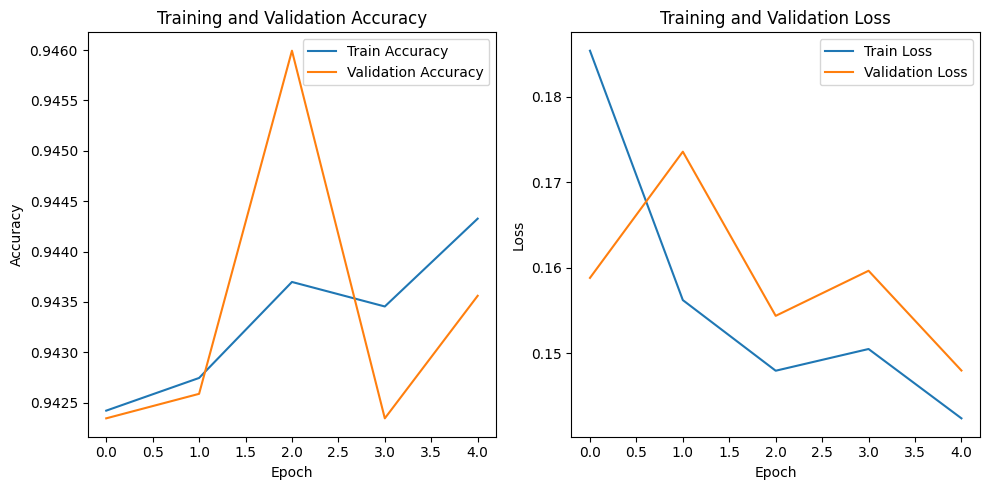

In [6]:
# Modified Transformer Block with Two Attention Layers
class TwoAttentionTransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TwoAttentionTransformerBlock, self).__init__()
        # First attention layer
        self.att1 = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)

        # Second attention layer
        self.att2 = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout2 = Dropout(rate)

        # Feed-forward network
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm3 = LayerNormalization(epsilon=1e-6)
        self.dropout3 = Dropout(rate)

    def call(self, inputs, training=False):
        # First attention layer
        attn_output1 = self.att1(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output1, training=training))

        # Second attention layer
        attn_output2 = self.att2(out1, out1)
        out2 = self.layernorm2(out1 + self.dropout2(attn_output2, training=training))

        # Feed-forward network
        ffn_output = self.ffn(out2)
        return self.layernorm3(out2 + self.dropout3(ffn_output, training=training))

# Function to create Transformer with two attention layers
def create_two_attention_transformer(num_heads):
    return Sequential([
        Input(shape=(max_length,)),
        Embedding(vocab_size, embedding_dim),
        TwoAttentionTransformerBlock(embedding_dim, num_heads, 32),
        GlobalMaxPooling1D(),
        Dropout(0.1),
        Dense(20, activation="relu"),
        Dropout(0.1),
        Dense(1, activation="sigmoid")
    ])

# Create and train the model
two_attention_transformer = create_two_attention_transformer(num_heads=4)

# Compile the model
two_attention_transformer.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("\nTraining Transformer with Two Attention Layers")
history_two_attention = two_attention_transformer.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_accuracy = two_attention_transformer.evaluate(X_test, y_test, verbose=0)[1]
print(f"\nTest Accuracy for Transformer with Two Attention Layers: {test_accuracy:.4f}")

# Visualization of training and validation performance
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_two_attention.history['accuracy'], label='Train Accuracy')
plt.plot(history_two_attention.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_two_attention.history['loss'], label='Train Loss')
plt.plot(history_two_attention.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Model Analysis

In [7]:
from sklearn.metrics import f1_score

# Initialize dictionaries for predictions and metrics
predictions = {}
metrics = {}

# Evaluate all models and save predictions
for name, model in models.items():
    preds = (model.predict(X_test) > 0.5).astype("int32")
    predictions[name] = preds
    metrics[name] = {
        'Accuracy': results[name],  # Use the stored accuracy
        'F1 Score': f1_score(y_test, preds)
    }

# Add Two Attention Transformer results
two_attention_preds = (two_attention_transformer.predict(X_test) > 0.5).astype("int32")
predictions['TwoAttentionTransformer'] = two_attention_preds
metrics['TwoAttentionTransformer'] = {
    'Accuracy': test_accuracy,  # Use the accuracy computed during evaluation
    'F1 Score': f1_score(y_test, two_attention_preds)
}

# Print metrics
print("\nPerformance Metrics:")
for name, metric in metrics.items():
    print(f"{name}: Accuracy = {metric['Accuracy']:.4f}, F1 Score = {metric['F1 Score']:.4f}")


482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step

Performance Metrics:
CNN_dropout_0.3: Accuracy = 0.9506, F1 Score = 0.9738
CNN_dropout_0.5: Accuracy = 0.9565, F1 Score = 0.9770
Transformer_heads_2: Accuracy = 0.9503, F1 Score = 0.9742
Transformer_heads_4: Accuracy = 0.9500, F1 Score = 0.9741
TwoAttentionTransformer: Accuracy = 0.9436, F1 Score = 0.9702


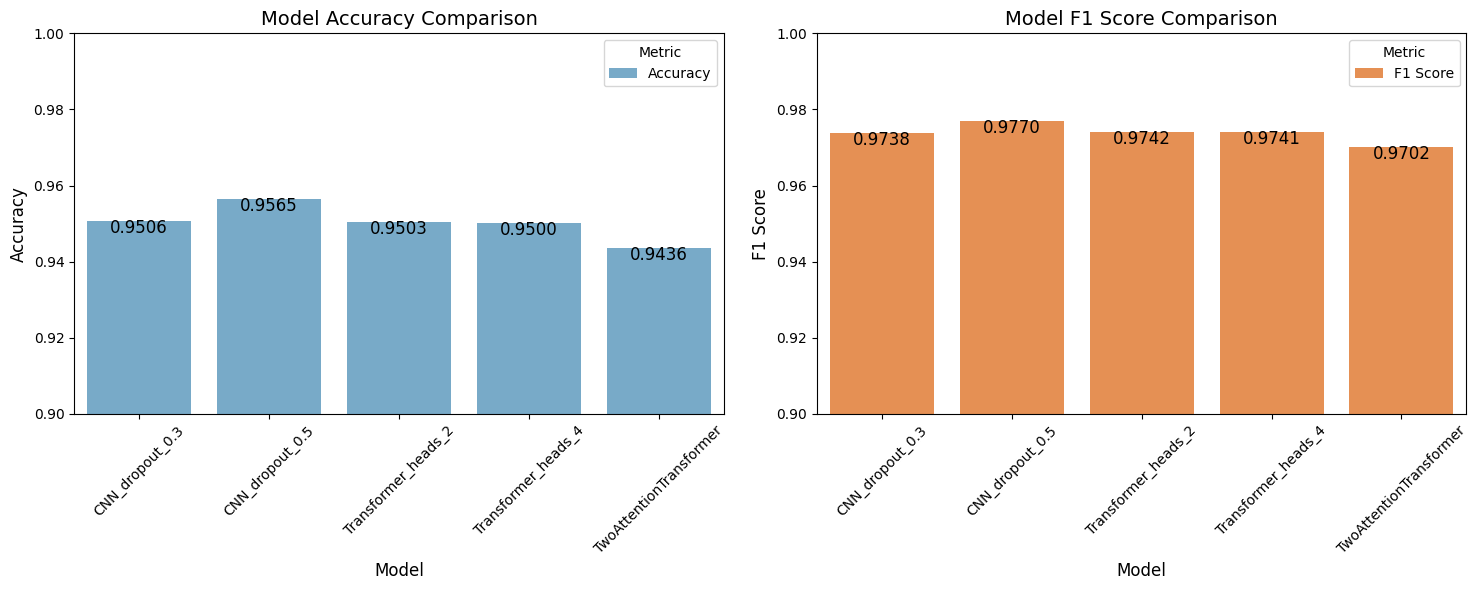

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
metrics_df = pd.DataFrame(metrics).T.reset_index()
metrics_df = metrics_df.rename(columns={'index': 'Model'})

# Melt the dataframe to have 'Model' as one column and 'Metric' and 'Score' as separate columns
metrics_long = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a figure with two subplots for Accuracy and F1 Score
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy Plot (using a distinct color palette)
sns.barplot(data=metrics_long[metrics_long['Metric'] == 'Accuracy'],
            x='Model', y='Score', hue='Metric', ax=axes[0], palette='Blues')

# Add annotations for accuracy scores (inside the bars)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.4f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, -5), textcoords='offset points')  # Adjusted to be inside the bars

axes[0].set_title("Model Accuracy Comparison", fontsize=14)
axes[0].set_xlabel("Model", fontsize=12)
axes[0].set_ylabel("Accuracy", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0.90, 1)  # Set y-axis scale from 0.90 to 1 for accuracy

# F1 Score Plot (using a different color palette)
sns.barplot(data=metrics_long[metrics_long['Metric'] == 'F1 Score'],
            x='Model', y='Score', hue='Metric', ax=axes[1], palette='Oranges')

# Add annotations for F1 scores (inside the bars)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.4f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, -5), textcoords='offset points')

axes[1].set_title("Model F1 Score Comparison", fontsize=14)
axes[1].set_xlabel("Model", fontsize=12)
axes[1].set_ylabel("F1 Score", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0.90, 1)  # Set y-axis scale from 0.90 to 1

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


After comparing the average accuracy and average F1 score, the model CNN_dropout_0.5 ended up having the best overall performance with top yield in both categories.

## ConceptNet

In [10]:
from gensim.models import KeyedVectors
import numpy as np

conceptnet_vectors = KeyedVectors.load_word2vec_format("numberbatch-en-19.08.txt", binary=False)

def get_conceptnet_embedding(word, embedding_model):
    try:
        return embedding_model[word]
    except KeyError:
        return np.zeros(embedding_model.vector_size)

def create_review_embedding(review, embedding_model):
    words = review.split()
    embeddings = [get_conceptnet_embedding(word, embedding_model) for word in words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(embedding_model.vector_size)

conceptnet_dim = conceptnet_vectors.vector_size
X_conceptnet = np.array([create_review_embedding(review, conceptnet_vectors) for review in reviews])

label_map = {'Pos': 1, 'Neg': 0}
y = np.array([label_map[label] for label in df['Pos_Neg']])

X_train_conceptnet, X_test_conceptnet, y_train_conceptnet, y_test_conceptnet = train_test_split(
    X_conceptnet, y, test_size=0.2, random_state=42
)

print(f"X_train_conceptnet shape: {X_train_conceptnet.shape}")
print(f"y_train_conceptnet shape: {y_train_conceptnet.shape}")

def create_cnn_with_conceptnet(input_dim, dropout_rate):
    return Sequential([
        Input(shape=(input_dim, 1)),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

cnn_conceptnet = create_cnn_with_conceptnet(conceptnet_dim, 0.3)

cnn_conceptnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_conceptnet.fit(
    X_train_conceptnet, y_train_conceptnet,,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

cnn_conceptnet_accuracy = cnn_conceptnet.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy for CNN with ConceptNet: {cnn_conceptnet_accuracy:.4f}")

predictions['ConceptNet_CNN'] = (cnn_conceptnet.predict(X_test) > 0.5).astype("int32")
metrics['ConceptNet_CNN'] = {
    'Accuracy': cnn_conceptnet_accuracy,
    'F1 Score': f1_score(y_test, predictions['ConceptNet_CNN'])
}

print("\nUpdated Performance Metrics:")
for name, metric in metrics.items():
    print(f"{name}: Accuracy = {metric['Accuracy']:.4f}, F1 Score = {metric['F1 Score']:.4f}")


metrics_df = pd.DataFrame(metrics).T.reset_index()
metrics_df = metrics_df.rename(columns={'index': 'Model'})


metrics_long = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=metrics_long[metrics_long['Metric'] == 'Accuracy'],
            x='Model', y='Score', ax=axes[0], palette='Blues')
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("Accuracy")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=metrics_long[metrics_long['Metric'] == 'F1 Score'],
            x='Model', y='Score', ax=axes[1], palette='Oranges')
axes[1].set_title("Model F1 Score Comparison")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("F1 Score")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Epoch 1/5
1927/1927 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0.2662

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 15415
'y' sizes: 0
